Exploratory data analysis (EDA) is a crucial component of data science which allows you to understand the basics of what your data looks like and what kinds of questions might be answered. For this task, we are going to clean, sanitise and explore our data. Using the automobile dataset, complete the steps outlined in this notebook by writing code in the cells.

In [1]:
# Import libraries
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd
import seaborn as sns

from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib inline

from word2number import w2n

In [2]:
# Load the movies dataset
automobiles_df = pd.read_csv("automobile.txt")

### Data Cleansing
#### Clean the data

Identify columns that are redundant or unnecessary. It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns `['normalized-losses', 'symboling']` from the data set as they will not be used in the analysis.

In [3]:
# Analyse output
automobiles_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
# Remove unwanted columns
automobiles_df = automobiles_df.drop(["normalized-losses", "symboling"], axis=1)

#### Remove any duplicate rows

In [5]:
# Drop duplicate rows
automobiles_df = automobiles_df.drop_duplicates()

#### Remove rows with missing data

Some automobiles in the database have missing values which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [6]:
# Drop rows with missing data
automobiles_df = automobiles_df.dropna()
# Remove rows with '?'
automobiles_df = automobiles_df[
    ~automobiles_df.apply(lambda x: x.astype(str).str.contains(r"\?").any(), axis=1)
]

Change columns with numerical data column to an integer data type using numpy’s `int64` method.

In [7]:
automobiles_df["num-of-doors"] = automobiles_df["num-of-doors"].str.lower().str.strip()
automobiles_df["num-of-doors"] = automobiles_df["num-of-doors"].apply(
    lambda x: w2n.word_to_num(x.lower()) if isinstance(x, str) else x
)

automobiles_df["num-of-cylinders"] = (
    automobiles_df["num-of-cylinders"].str.lower().str.strip()
)
automobiles_df["num-of-cylinders"] = automobiles_df["num-of-cylinders"].apply(
    lambda x: w2n.word_to_num(x.lower()) if isinstance(x, str) else x
)

automobiles_df["price"] = automobiles_df["price"].str.lower().str.strip()
automobiles_df["price"] = automobiles_df["price"].apply(
    lambda x: w2n.word_to_num(x.lower()) if isinstance(x, str) else x
)
automobiles_df["price"] = pd.to_numeric(automobiles_df["price"], errors="coerce")

automobiles_df["stroke"] = automobiles_df["stroke"].str.lower().str.strip()
automobiles_df["stroke"] = pd.to_numeric(automobiles_df["stroke"], errors="coerce")

automobiles_df["aspiration"] = automobiles_df["aspiration"].str.lower().str.strip()

### Finding Certain Categories
Locate all automobiles in the "hatchback" genre.

In [8]:
# Correct format of col 'body-style'
automobiles_df["body-style"] = automobiles_df["body-style"].str.lower().str.strip()
# Create a hatchback dataframe
hatchback_cars = automobiles_df[automobiles_df["body-style"] == "hatchback"]

### Now onto the exploration

#### Identify relationships between variables (features)

The main goal here is to identify and create relationships that can help you formulate ideas. We have defined questions to help you identify some relationships to explore.

#### Which are the 5 most expensive cars?

How do the most expensive and cheapest cars compare? Exploring the most expensive cars highlights if some moviecars are worth the money spent on them based on their fuel economy (mpg or miles per gallon)

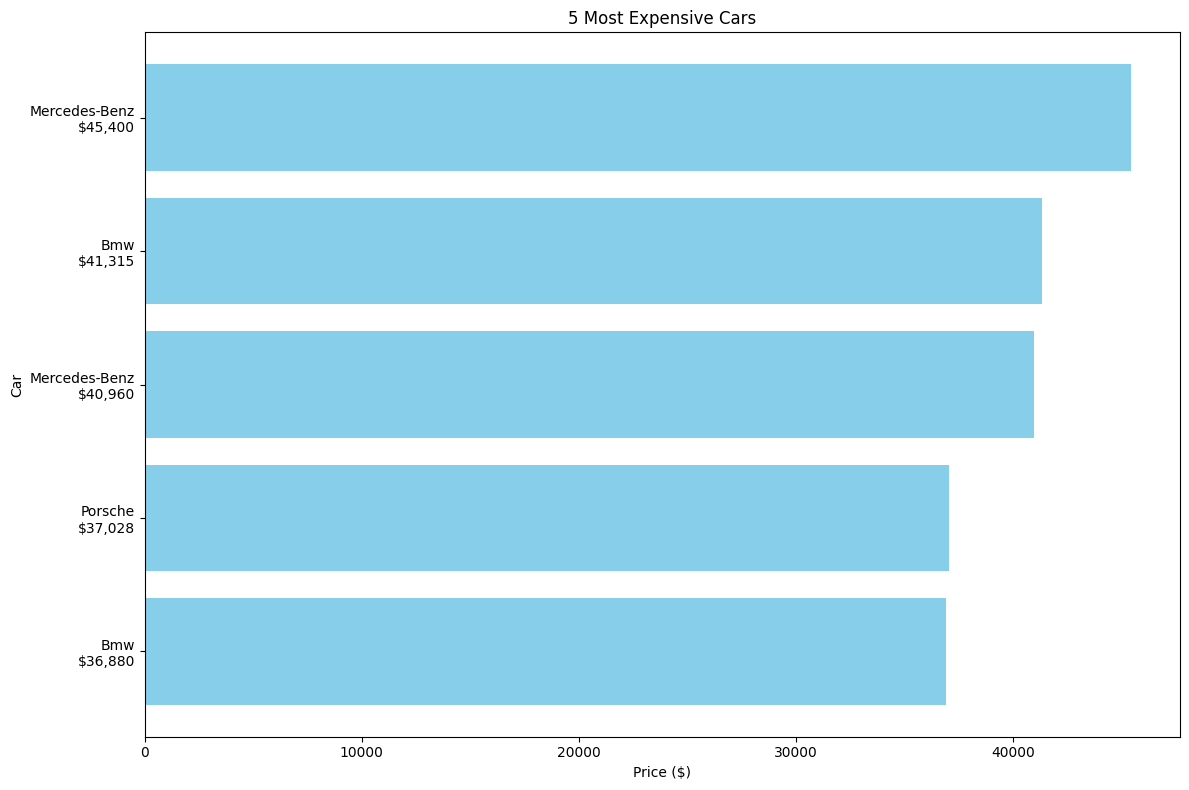

In [9]:
# Sort by price
top_5_price = automobiles_df.sort_values(by="price", ascending=False).head(5)

# Create labels
top_5_price["label"] = (
    top_5_price["make"].str.title()
    + "\n$"
    + top_5_price["price"].apply(lambda x: f"{int(x):,}")
)

# Sort for barh
top_5_price_sorted = top_5_price.sort_values(by="price", ascending=True)

# Plot
plt.figure(figsize=(12, 8))
plt.barh(top_5_price_sorted["label"], top_5_price_sorted["price"], color="skyblue")
plt.title("5 Most Expensive Cars")
plt.xlabel("Price ($)")
plt.ylabel("Car")
plt.tight_layout()
# Save the plot as a JPEG file
plt.savefig("5_most_expensive_cars.jpeg", format="jpeg")
plt.show()

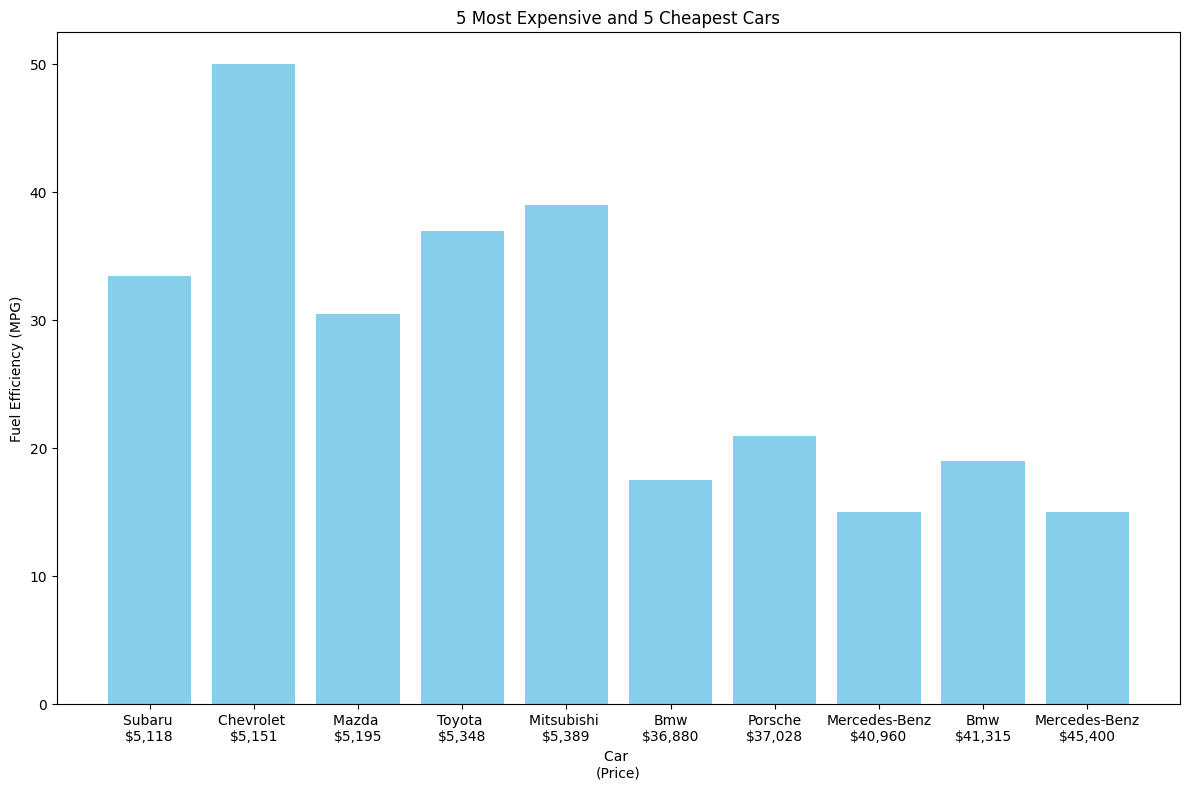

In [10]:
bottom_5_price = automobiles_df.sort_values(by="price", ascending=True).head(5)

# Create labels
bottom_5_price["label"] = (
    bottom_5_price["make"].str.title()
    + " \n$"
    + bottom_5_price["price"].apply(lambda x: f"{int(x):,}")
)

# Sort bottom
bottom_5_price_sorted = bottom_5_price.sort_values(by="price", ascending=True)

# Combine of bottom and top
top_bottom = pd.concat([bottom_5_price, top_5_price_sorted], ignore_index=False)

# Calculate average MPG
top_bottom["average-mpg"] = (top_bottom["city-mpg"] + top_bottom["highway-mpg"]) / 2

plt.figure(figsize=(12, 8))
plt.bar(top_bottom["label"], top_bottom["average-mpg"], color="skyblue")
plt.title("5 Most Expensive and 5 Cheapest Cars")
plt.ylabel("Fuel Efficiency (MPG)")
plt.xlabel("Car \n(Price)")
plt.tight_layout()
plt.savefig("5_most_expensive_cars_fuel.jpeg", format="jpeg")
plt.show()

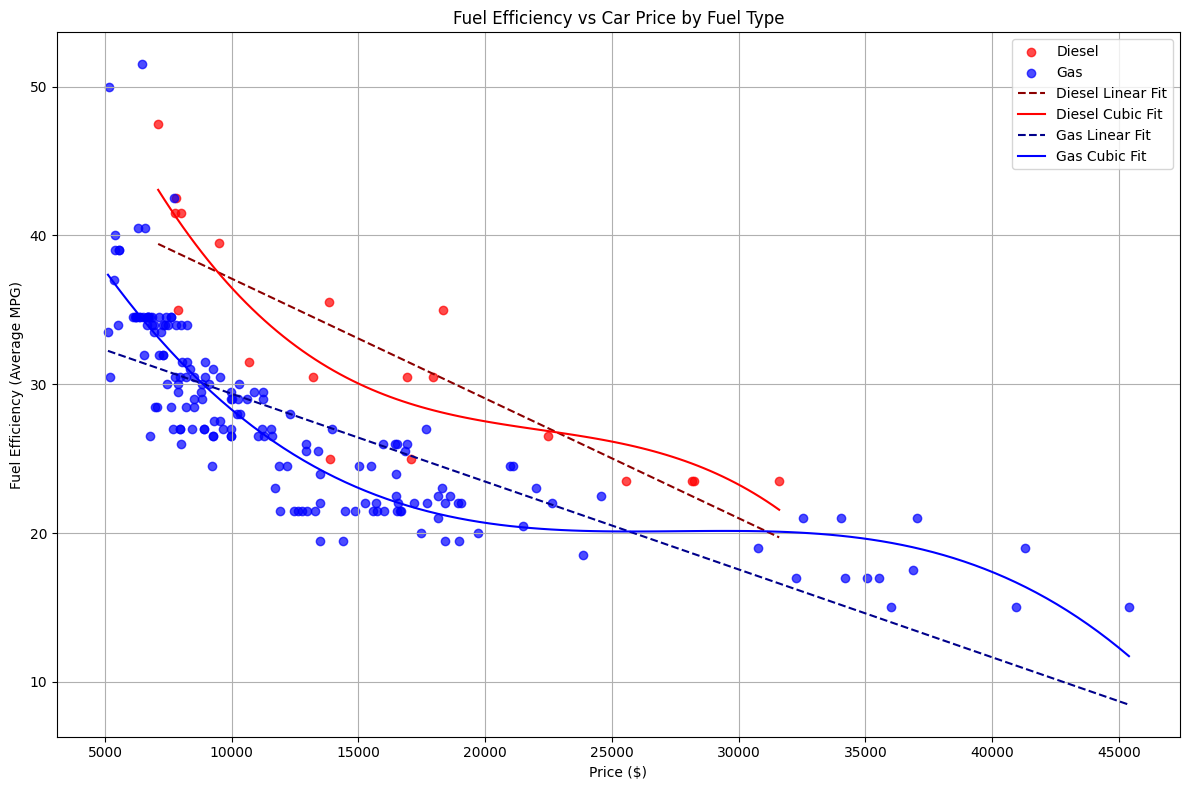

In [11]:
# Create a copy of the full df
all_cars = automobiles_df.copy()

# Calculate average MPG
all_cars["average-mpg"] = (all_cars["city-mpg"] + all_cars["highway-mpg"]) / 2

# Separate by fuel type
diesel = all_cars[all_cars["fuel-type"] == "diesel"]
gas = all_cars[all_cars["fuel-type"] == "gas"]

# Polynomial fits (degree 3)
coeffs_diesel = np.polyfit(diesel["price"], diesel["average-mpg"], deg=3)
poly_diesel = np.poly1d(coeffs_diesel)
x_diesel = np.linspace(diesel["price"].min(), diesel["price"].max(), 100)
y_fit_diesel = poly_diesel(x_diesel)

coeffs_gas = np.polyfit(gas["price"], gas["average-mpg"], deg=3)
poly_gas = np.poly1d(coeffs_gas)
x_gas = np.linspace(gas["price"].min(), gas["price"].max(), 100)
y_fit_gas = poly_gas(x_gas)

# Linear fits
coeffs_lin_diesel = np.polyfit(diesel["price"], diesel["average-mpg"], deg=1)
y_lin_diesel = np.poly1d(coeffs_lin_diesel)(x_diesel)

coeffs_lin_gas = np.polyfit(gas["price"], gas["average-mpg"], deg=1)
y_lin_gas = np.poly1d(coeffs_lin_gas)(x_gas)

# Plot
plt.figure(figsize=(12, 8))

plt.scatter(
    diesel["price"], diesel["average-mpg"], color="red", alpha=0.7, label="Diesel"
)
plt.scatter(gas["price"], gas["average-mpg"], color="blue", alpha=0.7, label="Gas")

plt.plot(
    x_diesel, y_lin_diesel, color="darkred", linestyle="--", label="Diesel Linear Fit"
)
plt.plot(x_diesel, y_fit_diesel, color="red", label="Diesel Cubic Fit")

plt.plot(x_gas, y_lin_gas, color="darkblue", linestyle="--", label="Gas Linear Fit")
plt.plot(x_gas, y_fit_gas, color="blue", label="Gas Cubic Fit")

plt.title("Fuel Efficiency vs Car Price by Fuel Type")
plt.xlabel("Price ($)")
plt.ylabel("Fuel Efficiency (Average MPG)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("fuel eff vs car by fuel.jpeg", format="jpeg")
plt.show()

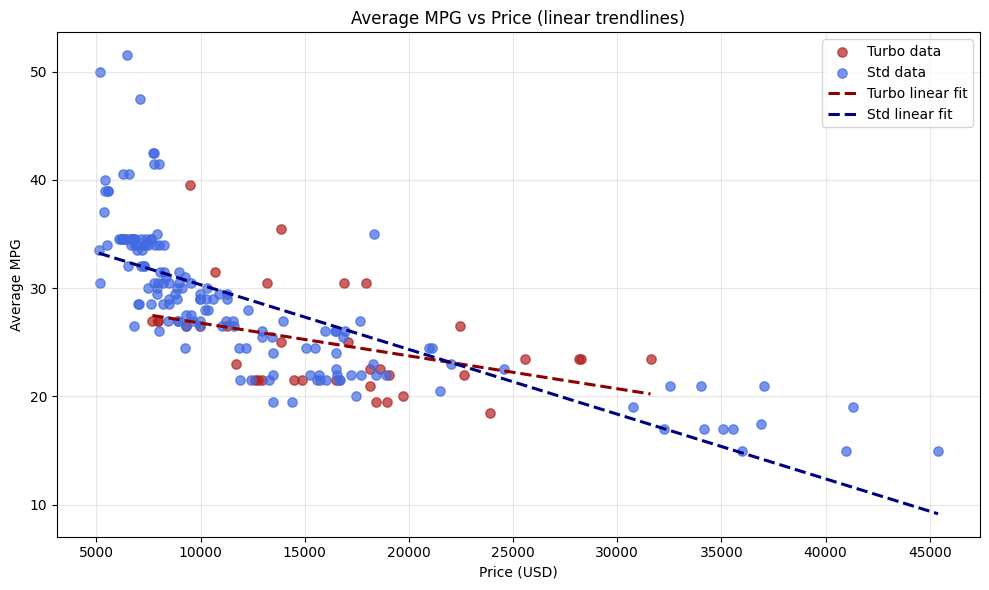

In [21]:
# Split df by aspiration
turbo = all_cars[all_cars["aspiration"] == "turbo"]
std = all_cars[all_cars["aspiration"] == "std"]

# Fit linear lines
m_t, b_t = np.polyfit(turbo["price"], turbo["average-mpg"], 1)
m_s, b_s = np.polyfit(std["price"], std["average-mpg"], 1)

# x‑axis ranges
x_t = np.linspace(turbo["price"].min(), turbo["price"].max(), 200)
x_s = np.linspace(std["price"].min(), std["price"].max(), 200)

# Plot
plt.figure(figsize=(10, 6))

# Scatter points
plt.scatter(
    turbo["price"],
    turbo["average-mpg"],
    45,
    alpha=0.7,
    color="firebrick",
    label="Turbo data",
)
plt.scatter(
    std["price"], std["average-mpg"], 45, alpha=0.7, color="royalblue", label="Std data"
)

# Regression lines
plt.plot(x_t, m_t * x_t + b_t, "--", lw=2.2, color="darkred", label="Turbo linear fit")
plt.plot(x_s, m_s * x_s + b_s, "--", lw=2.2, color="navy", label="Std linear fit")

# Labels & style
plt.title("Average MPG vs Price (linear trendlines)")
plt.xlabel("Price (USD)")
plt.ylabel("Average MPG")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("fuel_eff_vs_price_linear.jpeg", dpi=300)
plt.show()

#### Which manufacturer builds the most fuel efficient vehicles?

Compare the average mpg for each vehicle manufacture's vehicles and create a bar plot

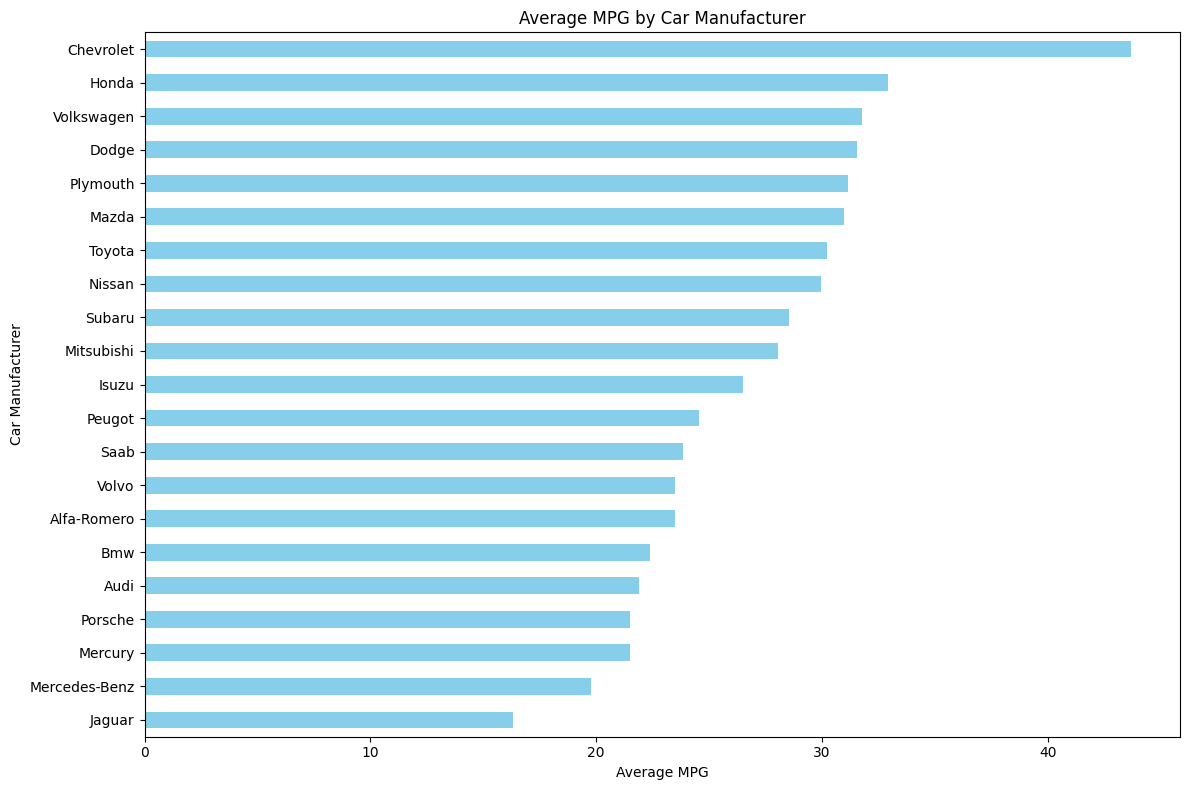

In [13]:
# Create a copy of the full df
all_make = automobiles_df.copy()

# Calculate average MPG
all_make["average-mpg"] = (all_make["city-mpg"] + all_make["highway-mpg"]) / 2

# Group by manufacturer (make) and calculate the mean of the average mpg
avg_mpg_by_make = all_make.groupby("make")["average-mpg"].mean()
# Capitalize the first letter of each word in the manufacturer names
avg_mpg_by_make.index = avg_mpg_by_make.index.str.title()
# Plotting
plt.figure(figsize=(12, 8))
avg_mpg_by_make.sort_values().plot(kind="barh", color="skyblue")
plt.title("Average MPG by Car Manufacturer")
plt.xlabel("Average MPG")
plt.ylabel("Car Manufacturer")
plt.tight_layout()  # Adjust layout to fit labels
plt.savefig("avg mpg per manu.jpeg", format="jpeg")
plt.show()

#### Which vehicles have the largest engine capacity.
Sort the dataframe based on the engine-size column.

<Figure size 1200x800 with 0 Axes>

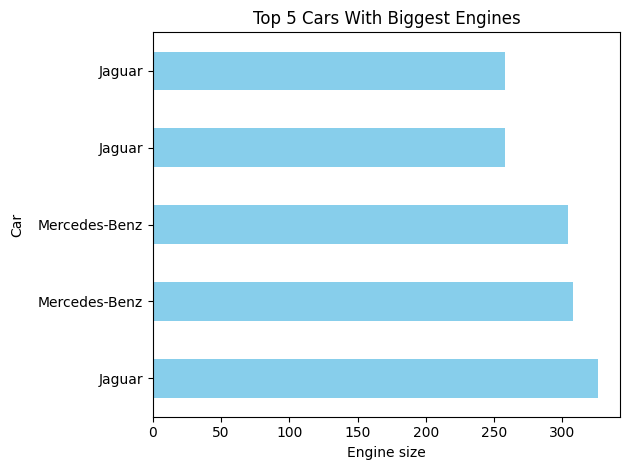

In [14]:
# Sort the DataFrame by 'engine-size' in descending order and get top 5 most expensive cars
sort_automobiles_eng_size = automobiles_df.sort_values("engine-size", ascending=False)
top_5_eng_size = sort_automobiles_eng_size.head(5)
top_5_eng_size.loc[:, "make"] = top_5_eng_size["make"].str.title()

# Plotting
plt.figure(figsize=(12, 8))
top_5_eng_size.plot(
    kind="barh", x="make", y="engine-size", color="skyblue", legend=False
)

# Customize the plot
plt.title("Top 5 Cars With Biggest Engines")
plt.xlabel("Engine size")
plt.ylabel("Car", labelpad=10)
plt.tight_layout()  # Adjust layout to fit labels

plt.savefig("5_biggest_eng.jpeg", format="jpeg")
plt.show()

#### Which vehicle manufacturer has the most car models in the dataset

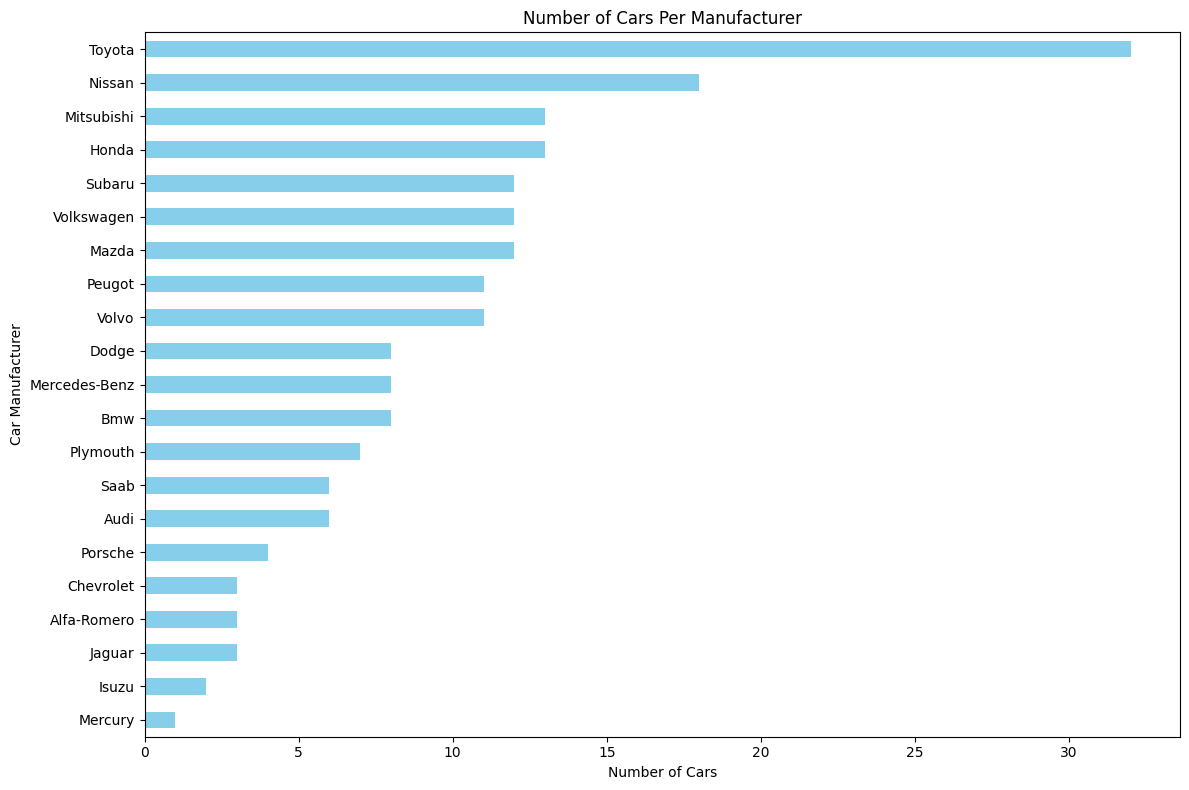

In [15]:
# Group by manufacturer (make) and count the number of cars per make
num_per_make = automobiles_df.groupby("make").size()

# Capitalize the first letter of each word in the manufacturer names
num_per_make.index = num_per_make.index.str.title()

# Sort the data for a cleaner plot
num_per_make = num_per_make.sort_values()

# Plotting
plt.figure(figsize=(12, 8))
num_per_make.plot(kind="barh", color="skyblue")

# Customize the plot
plt.title("Number of Cars Per Manufacturer")
plt.xlabel("Number of Cars")
plt.ylabel("Car Manufacturer")
plt.tight_layout()  # Adjust layout to fit labels

plt.savefig("num cor per manu.jpeg", format="jpeg")
plt.show()

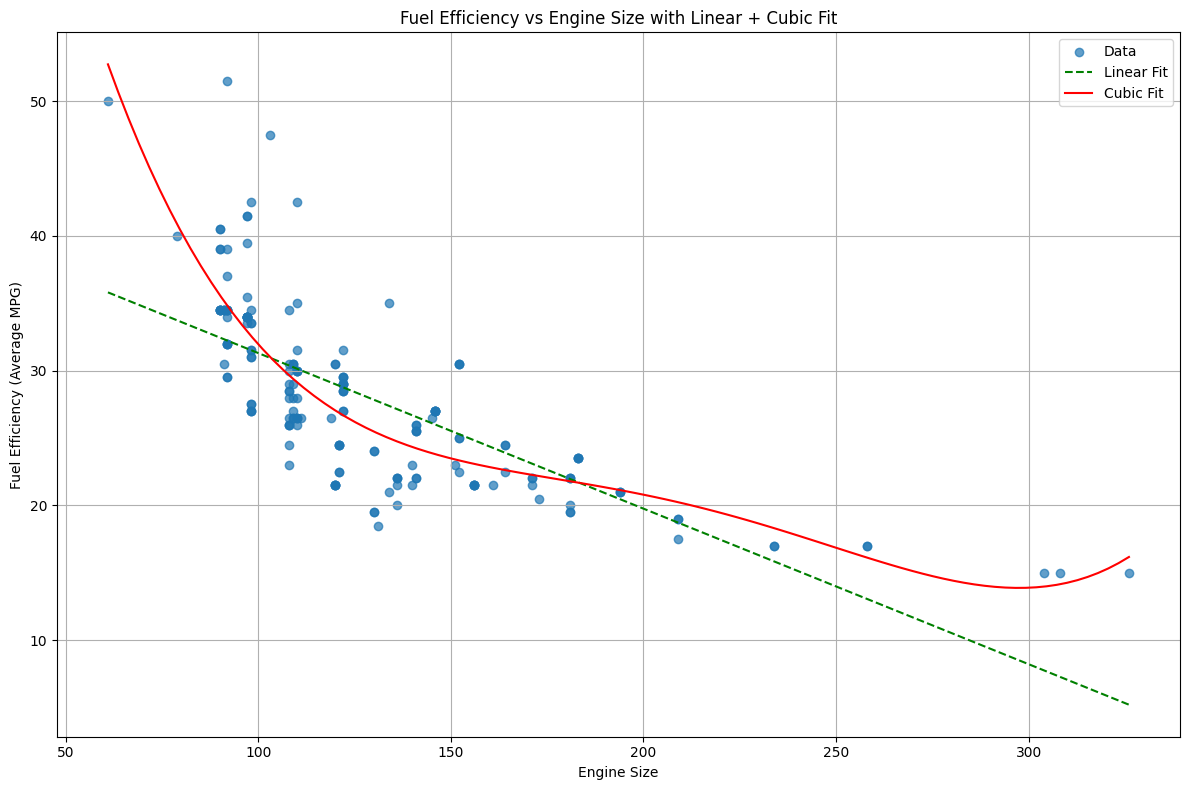

In [16]:
# Fit a linear regression line
coeffs = np.polyfit(all_cars["engine-size"], all_cars["average-mpg"], deg=4)
poly = np.poly1d(coeffs)

# Generate x values and corresponding fitted y values
x = np.linspace(all_cars["engine-size"].min(), all_cars["engine-size"].max(), 100)
y_fit = poly(x)

# Linear
coeffs_lin = np.polyfit(all_cars["engine-size"], all_cars["average-mpg"], deg=1)
y_lin = np.poly1d(coeffs_lin)(x)

# Plot
plt.figure(figsize=(12, 8))


plt.scatter(all_cars["engine-size"], all_cars["average-mpg"], alpha=0.7, label="Data")
plt.plot(x, y_lin, color="green", linestyle="--", label="Linear Fit")
plt.plot(x, y_fit, color="red", label="Cubic Fit")

plt.title("Fuel Efficiency vs Engine Size with Linear + Cubic Fit")
plt.xlabel("Engine Size")
plt.ylabel("Fuel Efficiency (Average MPG)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("Fuel Efficiency vs Engine Size.jpeg", format="jpeg")
plt.show()